In [1]:
from learningActorCritic import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
from neuralNetwork import NeuralNetwork
import torch
import torch.nn as nn
from torch.distributions import Categorical

In [2]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1/3
adversaryProbs[2]=1/3
adversaryProbs[10]=1/3
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25, adversaryProbs=adversaryProbs, advHistoryNum=2)
adversaryProbs

tensor([0.3333, 0.0000, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.3333, 0.0000])

In [3]:
game.reset()

(tensor([  0.0000, 200.0000, 128.5000,   0.0000,   0.0000]), 0, False)

In [4]:
game.adversaryChoosePrice()

95

In [5]:
neuralNet=NeuralNetwork(num_input=3+game.advHistoryNum, lr=0.0001)
algorithm = ReinforceAlgorithm(game, neuralNet, numberIterations=1, numberEpisodes=5_000_000, discountFactor =0.9)

--------------------------------------------------
0   adversary:  AdversaryModes.guess_132
  actions:  tensor([ 3,  0, 17, 11, 19, 24, 37, 33, 33, 26, 10, 19, 21, 17, 17, 27,  6, 41,
        25, 42, 49,  1, 41, 36, 16])
loss=  tensor(717.2204, grad_fn=<AddBackward0>)   , actor=  tensor(243.0031, grad_fn=<DivBackward0>)   , critic=  tensor(4742.1733, grad_fn=<SumBackward0>)   , return=  101950.55299710043
probs of actions:  tensor([0.0208, 0.0219, 0.0233, 0.0165, 0.0234, 0.0201, 0.0211, 0.0220, 0.0220,
        0.0186, 0.0178, 0.0232, 0.0176, 0.0230, 0.0230, 0.0191, 0.0200, 0.0198,
        0.0177, 0.0208, 0.0175, 0.0194, 0.0199, 0.0183, 0.0213],
       grad_fn=<ExpBackward0>)
shouldBreak: False
--------------------------------------------------
10000   adversary:  AdversaryModes.guess_132
  actions:  tensor([38, 23, 14, 48,  2, 17, 37, 23, 13,  1, 30,  1, 26,  2, 46,  6,  8,  6,
        48,  6, 46, 32, 19,  0, 26])
loss=  tensor(97.8313, grad_fn=<AddBackward0>)   , actor=  tensor(-209.1

--------------------------------------------------
120000   adversary:  AdversaryModes.guess_132
  actions:  tensor([28, 28, 28, 44, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 28, 28, 28, 28, 28, 28])
loss=  tensor(77.8203, grad_fn=<AddBackward0>)   , actor=  tensor(0.3534, grad_fn=<DivBackward0>)   , critic=  tensor(774.6689, grad_fn=<SumBackward0>)   , return=  68723.20956676225
probs of actions:  tensor([9.6758e-01, 9.7788e-01, 9.8639e-01, 7.5353e-04, 9.8556e-01, 9.8645e-01,
        9.8631e-01, 9.8595e-01, 9.8540e-01, 9.8480e-01, 9.8400e-01, 9.8306e-01,
        9.8206e-01, 9.8098e-01, 9.7982e-01, 9.7861e-01, 9.7734e-01, 9.7604e-01,
        9.7469e-01, 9.7332e-01, 9.7192e-01, 9.7051e-01, 9.6908e-01, 9.6764e-01,
        9.6618e-01], grad_fn=<ExpBackward0>)
shouldBreak: False
--------------------------------------------------
130000   adversary:  AdversaryModes.myopic
  actions:  tensor([28, 28, 28, 24, 28, 24, 28, 28, 28, 28, 28, 28, 28, 28, 28, 24, 28, 28,
  

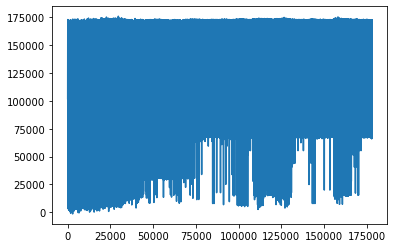

In [6]:
algorithm.solver()

In [7]:
advModeNames=""
for i in range(len(adversaryProbs)):
    if adversaryProbs[i]!=0:
        tmp="{:.1f}".format(adversaryProbs[i])
        advModeNames+=f"{(AdversaryModes(i)).name}-{tmp}-"
    
name=f"ep {algorithm.numberEpisodes}, {advModeNames}, {game.advHistoryNum} hist, {neuralNet.lr} lr"
neuralNet.save(name=name)

<AxesSubplot:>

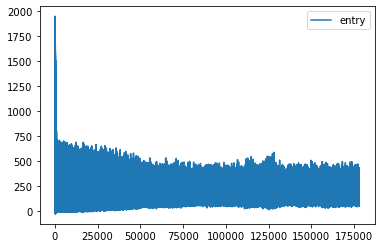

In [10]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T
learning = pd.DataFrame(algorithm.returns[0],columns=['entry'])
loss = pd.DataFrame(algorithm.loss[0],columns=['entry'])
loss.plot()

,0,1
0,200.000000,200.000000
1,215.750000,184.250000
2,203.062500,196.937500
3,193.546875,206.453125
4,186.410156,213.589844
5,181.057617,218.942383
6,177.043213,222.956787
7,174.032410,225.967590
8,171.774307,228.225693
9,170.080730,229.919270


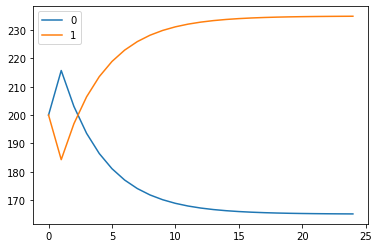

In [11]:
demandPotential.plot()
demandPotential

In [12]:
profits.sum(axis=0)

0    67918.999343
1    50385.692684
dtype: float64

,0,1
0,4328.250000,4148.000000
1,5516.390625,1215.000000
2,4549.563477,1367.250000
3,3877.262268,1481.437500
4,3402.747135,1567.078125
5,3063.573096,1631.308594
6,2818.593240,1679.481445
7,2640.146228,1715.611084
8,2509.285401,1742.708313
9,2412.812899,1763.031235


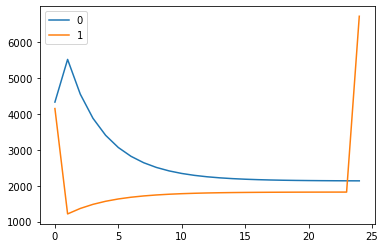

In [13]:
profits.plot()
profits


,0,1
0,100.500000,132.000000
1,108.375000,83.000000
2,102.031250,83.000000
3,97.273438,83.000000
4,93.705078,83.000000
5,91.028809,83.000000
6,89.021606,83.000000
7,87.516205,83.000000
8,86.387154,83.000000
9,85.540365,83.000000


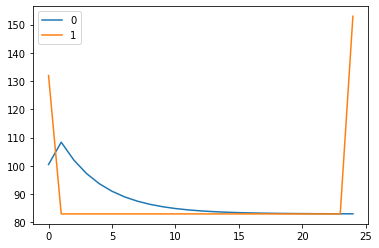

In [14]:
prices.plot()
prices

<AxesSubplot:>

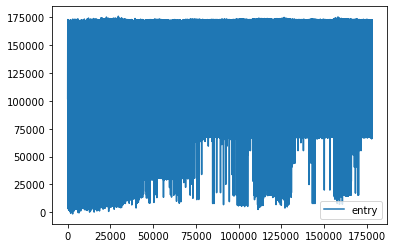

In [15]:
learning.plot()

In [16]:
# pricelearning = pd.DataFrame(game.prices.mean(axis = 0))
# pricelearning.plot()

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
learning = learning.to_numpy()
learning_2 = [0]*len(learning)
for i in range(len(learning)):
    learning_2[i] = learning[i][0]

In [19]:
avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

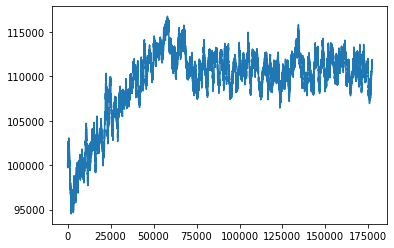

In [20]:
plt.plot(avg_learning)
plt.show()